https://www.bigkinds.or.kr/ 사이트에 접속

1. 로그인
-----------메이페이지----------------
1. 검색키워드 "소년범" 입력
2. 상세검색 클릭
3. 기간 버튼 클릭
4. 시작일자를 10년 전으로
5. 종료일자를 오늘
6. 통합분류 정치, 사회, 문화
7. 사건사고 분류: 범죄, 사회
8. 적용하기
-----------검색 페이지 이동------------
1. 저장되어있는 파일을 다운로드
1.1. step3 를 클릭하고
1.2. 다운로드 클릭
2. 가장 많이 나온 순으로 정렬해서 갯수를 제한해서 상위 N개만
3. 출현빈도랑 글씨 크기를 비례하게그려내는 것 : 파이썬 라이브러리

In [2]:
!pip install selenium

In [90]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import datetime
import time 
import pandas as pd

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

In [67]:
user_id = ''
user_pw = ''

In [68]:
# 웹 드라이버 경로 설정
path = './pdsample/chromedriver.exe'

# 크롬 웹 드라이버 객체 생성
driver = webdriver.Chrome(path)

In [69]:
def dateString(year):
    today = datetime.datetime.now()
    
    # 시작일자
    year_before = today - datetime.timedelta(days=365 * year)
    sy = str(year_before.year)
    sm = str(year_before.month)
    sd = str(year_before.day)
    
    if len(sm) == 1:
        sm = '0' + sm

    if len(sd) == 1:
        sd = '0' + sd

    start_date = sy + sm + sd
    
    
    ey = str(today.year)
    em = str(today.month)
    ed = str(today.day)

    if len(em) == 1:
        em = '0' + em

    if len(ed) == 1:
        ed = '0' + ed

    end_date = ey + em + ed
    
    return start_date, end_date

In [76]:
def login():
    
    # url 설정
    url = 'https://www.bigkinds.or.kr/'

    # 페이지 열기
    driver.get(url)
    
    # ---------------------------로그인
    # 로그인 버튼 클릭

    win_size = driver.get_window_size()
    width = win_size['width']

    if width <= 1024:
        search_logm_btn = driver.find_element_by_class_name('btn-menu')
        search_logm_btn.click()
        time.sleep(1)
        search_logm_btn = driver.find_element_by_css_selector('#header > div.hd-gnb > div.gnb-top > button.btn-login.login-modal-btn.login-area-before')
        search_logm_btn.click()

    else:
        search_logd_btn = driver.find_element_by_css_selector('#header > div.hd-top > div > div > button.btn-login.login-modal-btn.login-area-before')
        search_logd_btn.click()

    time.sleep(1)

    # 로그인 
    login_id = driver.find_element_by_id('login-user-id') 
    login_id.send_keys(user_id)

    login_pw = driver.find_element_by_id('login-user-password') 
    login_pw.send_keys(user_pw)

    login_btn = driver.find_element_by_id('login-btn') 
    login_btn.click()
    
    time.sleep(5)
    

In [78]:
def download(year):
    
    # url 설정
    url = 'https://www.bigkinds.or.kr/'

    # 페이지 열기
    driver.get(url)
    
    # 검색키워드 "소년범" 입력
    inputSearch = driver.find_element_by_id('total-search-key')
    inputSearch.clear()
    inputSearch.send_keys('소년범')

    time.sleep(1)

    # 상세검색 클릭
    search_detail_btn = driver.find_element_by_class_name('btn-srchDetail')
    search_detail_btn.click()

    time.sleep(1)


    # 기간 버튼 클릭
    serach_period_btn = driver.find_element_by_css_selector('.tab1 > a.tab-btn')
    serach_period_btn.click()

    time.sleep(1)

    start_date, end_date = dateString(year)


    # 날짜 "20110715" ~ "20210716" 입력
    inputDateStart = driver.find_element_by_id('search-begin-date')
    # 1. 백스페이스를 10번정도 눌러줘
    for i in range(10):
        inputDateStart.send_keys(Keys.BACKSPACE)

    inputDateStart.send_keys(start_date)
    inputDateStart.send_keys(Keys.ENTER)


    time.sleep(1)


    # 통합 분류 버튼 클릭
    serach_period_btn = driver.find_element_by_css_selector('.tab3 > a.tab-btn')
    serach_period_btn.click()

    # 통합분류 정치 체크박스
    # 정치, 사회, 문화
    for i in ['1', '3', '4']:
        selector = '#srch-tab3 > ul > li:nth-child({}) .gj-checkbox-bootstrap'.format(i)
        search_cla_check_box = driver.find_element_by_css_selector(selector)
        search_cla_check_box.click()

    time.sleep(1)

    # 사건사고 분류 버튼 클릭
    serach_period_btn = driver.find_element_by_css_selector('.tab4 > a.tab-btn')
    serach_period_btn.click()

    time.sleep(1)


    # 통합분류 정치 체크박스
    # 범죄, 사회
    for i in ['1', '4']:
        selector = '#srch-tab4 > ul > li:nth-child({}) .gj-checkbox-bootstrap'.format(i)
        search_cla_check_box = driver.find_element_by_css_selector(selector)
        search_cla_check_box.click()

    time.sleep(1)

    # 적용하기
    searchBtn = driver.find_element_by_css_selector('#search-foot-div > div.foot-btn > button.btn.btn-search.news-search-btn.news-report-search-btn')
    searchBtn.click()
    
    
    time.sleep(10)
    
    
    # step3 누르기
    step3 = driver.find_element_by_id('collapse-step-3')
    step3.click()

    time.sleep(5)

    # 다운로드 버튼 클릭
    download = driver.find_element_by_css_selector('#analytics-data-download > div.btm-btn-wrp > button')
    download.click()

    time.sleep(3)

    # alert 에 확인 누르기
    try:

        result = driver.switch_to_alert()
        result.accept()
        result.dismiss()
    except:
        print('error')

    time.sleep(20)

    # 파일명 : NewsResult_{시작일자}-{종료일자}.xlsx
    file_name = 'NewsResult_{}-{}.xlsx'.format(start_date, end_date)

    df = pd.read_excel('./Downloads/' + file_name)
    
    return df

In [95]:
def getWords(df, index, count = 30):
    # 키워드 : 14번 컬럼
    keyword_list = df[df.columns[index]].str.split(',').sum()

    # 1글자 이상인 것만 추출
    keyword_list = [n for n in keyword_list if len(n) > 1]

    # 단어 별 노출횟수 추출
    keyword_counts = Counter(keyword_list)

    # 상위 30개 추출
    keyword_words = keyword_counts.most_common(count)

    return keyword_words

In [98]:
# login()
df_1 = download(1)
df_3 = download(3)
df_5 = download(5)
df_10 = download(10)

<ipython-input-78-83340ba05091>:97: DeprecationWarning: use driver.switch_to.alert instead
  result = driver.switch_to_alert()


error


In [99]:
KEYWORD_INDEX = 14
TYPE_INDEX = 15

kw1 = getWords(df_1, KEYWORD_INDEX), 
tw1 = getWords(df_1, TYPE_INDEX)

kw3 = getWords(df_3, KEYWORD_INDEX), 
tw3 = getWords(df_3, TYPE_INDEX)

kw5 = getWords(df_5, KEYWORD_INDEX), 
tw5 = getWords(df_5, TYPE_INDEX, 100)

kw10 = getWords(df_10, KEYWORD_INDEX), 
tw10 = getWords(df_10, TYPE_INDEX)

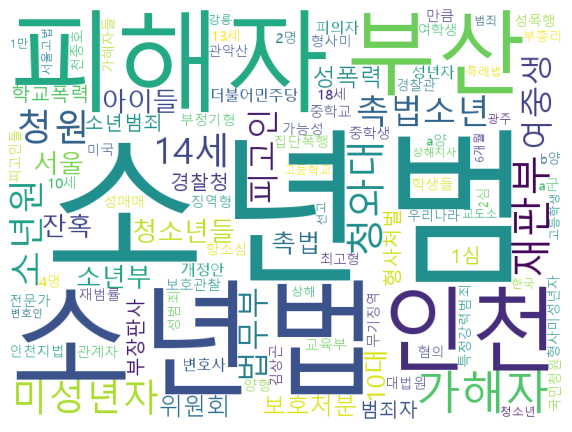

In [103]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)


cloud = wordcloud.generate_from_frequencies(dict(tw5))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()